In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dealing with null values

#### (1) Age Column

In [4]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

#### (2) Cabin Column & Embarked Column

In [5]:
titanic['Cabin'] = titanic['Cabin'].fillna('UNK')
titanic['Embarked'] = titanic['Embarked'].fillna('UNK')

### Check out if all the null values are gone!

In [9]:
titanic.isnull().sum(axis='rows')

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Dealing with categorical columns

In [11]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
titanic['Cabin'].value_counts()

UNK            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
B102             1
D49              1
E50              1
F E69            1
B69              1
Name: Cabin, Length: 148, dtype: int64

In [13]:
titanic['Embarked'].value_counts()

S      644
C      168
Q       77
UNK      2
Name: Embarked, dtype: int64

In [14]:
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic['Cabin'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### Drop meaningless columns

In [15]:
meaninglessColumns_list = ['PassengerId', 'Name', 'Ticket']
titanic = titanic.drop(columns=meaninglessColumns_list, axis='columns')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,U,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,U,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,U,S


### Explore data

''

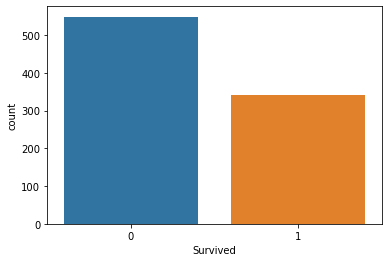

In [17]:
sns.countplot(data=titanic, x='Survived')
;

''

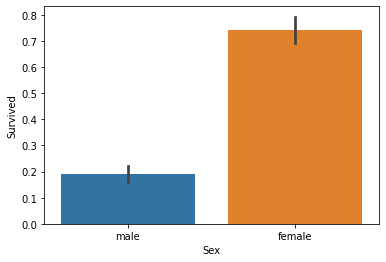

In [18]:
sns.barplot(data=titanic, x='Sex', y='Survived')
;

''

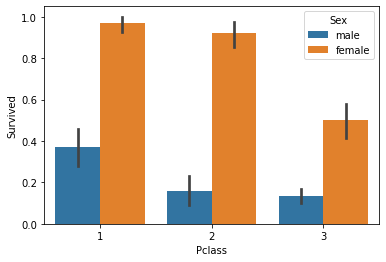

In [19]:
sns.barplot(data=titanic, x='Pclass', y='Survived', hue='Sex')
;

### Categorical values → Numeric values

In [20]:
from sklearn.preprocessing import LabelEncoder

categoricalColumns_list = ['Sex', 'Cabin', 'Embarked']

for col in categoricalColumns_list:
    le = LabelEncoder()
    titanic[col] = le.fit_transform(titanic[col])

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,8,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,8,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,8,2


### Creating Model Set and Model Learning

In [21]:
from sklearn.model_selection import train_test_split

x = titanic.drop(columns='Survived', axis='columns')
y = titanic['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score

dt = DecisionTreeClassifier(random_state=1234)

dt.fit(x_train, y_train)
y_predicted = dt.predict(x_test)

print('Accuracy Score:', accuracy_score(y_test, y_predicted).round(4))
print('R-squared Score:', r2_score(y_test, y_predicted).round(4))

Accuracy Score: 0.7709
R-squared Score: 0.0381


### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted)

array([[85, 24],
       [17, 53]], dtype=int64)

''

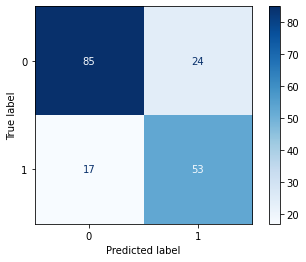

In [24]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt, x_test, y_test, cmap=plt.cm.Blues)
;

### Precision (정확도) / Recall(재현율)

In [25]:
predicted_proba = dt.predict_proba(x)
print(predicted_proba)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [30]:
threshold_list = [0.5, 0.1]

for threshold in threshold_list:
    print(confusion_matrix(y, predicted_proba[:, 1] > threshold))

[[523  26]
 [ 24 318]]
[[503  46]
 [ 17 325]]


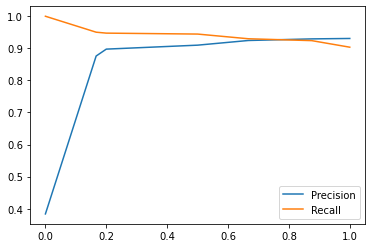

''

In [31]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y, predicted_proba[:, 1])

plt.plot(thresholds, precisions[:len(thresholds)], label='Precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='Recall')
plt.legend()
plt.show()
;

### Lift Chart

In [32]:
titanic['predicted'] = predicted_proba[:, 1]
titanic = titanic.sort_values('predicted', ascending=False).reset_index(drop=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,predicted
0,1,1,1,4.0,0,2,81.8583,0,2,1.0
1,1,3,1,3.0,4,2,31.3875,8,2,1.0
2,1,1,0,38.0,0,0,227.5250,2,0,1.0
3,1,2,0,27.0,0,0,10.5000,4,2,1.0
4,1,1,0,63.0,1,0,77.9583,3,2,1.0


In [34]:
titanic['response'] = titanic['Survived'].cumsum() / (titanic.index + 1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,predicted,response
0,1,1,1,4.0,0,2,81.8583,0,2,1.0,1.0
1,1,3,1,3.0,4,2,31.3875,8,2,1.0,1.0
2,1,1,0,38.0,0,0,227.5250,2,0,1.0,1.0
3,1,2,0,27.0,0,0,10.5000,4,2,1.0,1.0
4,1,1,0,63.0,1,0,77.9583,3,2,1.0,1.0


In [37]:
print('Avg. Survived:', np.round(titanic['Survived'].mean(), 4))

Avg. Survived: 0.3838


In [38]:
titanic['lift'] = titanic['response'] / titanic['Survived'].mean()
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,predicted,response,lift
0,1,1,1,4.0,0,2,81.8583,0,2,1.0,1.0,2.605263
1,1,3,1,3.0,4,2,31.3875,8,2,1.0,1.0,2.605263
2,1,1,0,38.0,0,0,227.5250,2,0,1.0,1.0,2.605263
3,1,2,0,27.0,0,0,10.5000,4,2,1.0,1.0,2.605263
4,1,1,0,63.0,1,0,77.9583,3,2,1.0,1.0,2.605263


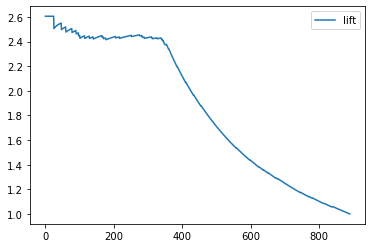

''

In [39]:
plt.plot(titanic.index, titanic['lift'], label='lift')
plt.legend()
plt.show()
;

### ROC Curve

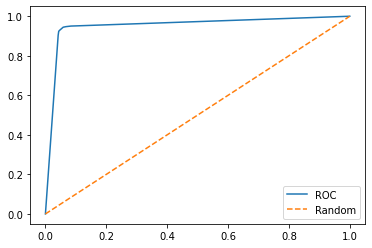

''

In [40]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(titanic['Survived'], titanic['predicted'])

plt.plot(fprs, tprs, label='ROC')
plt.plot([0, 1], [0, 1], '--', label='Random')
plt.legend()
plt.show()
;

### ROC-AUC

In [41]:
from sklearn.metrics import roc_auc_score

print('AUC Score:', np.round(roc_auc_score(titanic['Survived'], titanic['predicted']), 4))

AUC Score: 0.9518


### k-fold cross validation

In [42]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_input_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_target_df = pd.DataFrame(iris['target'], columns=['target'])

In [43]:
iris_input_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
iris_target_df.head()

,target
0,0
1,0
2,0
3,0
4,0


In [45]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
cv_accuracy = []

In [46]:
for train_idx, test_idx in kfold.split(iris_input_df):
    
    x_train, x_test = iris_input_df.iloc[train_idx], iris_input_df.iloc[test_idx]
    y_train, y_test = iris_target_df.iloc[train_idx], iris_target_df.iloc[test_idx]
    
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_predicted = dt.predict(x_test)
    
    accuracy = np.round(accuracy_score(y_test, y_predicted), 4)
    cv_accuracy.append(accuracy)
    
print(cv_accuracy)
print('Avg. Accuracy Score:', np.mean(cv_accuracy).round(4))

[1.0, 0.9667, 0.8667, 0.9333, 0.7667]
Avg. Accuracy Score: 0.9067


### Stratified k-fold cross validation

#### (1) without Stratifying

In [48]:
iteration_cnt = 0

for train_idx , test_idx in kfold.split(iris_input_df):
    
    iteration_cnt += 1
    
    y_train = iris_target_df['target'][train_idx]
    y_test = iris_target_df['target'][test_idx]
    
    print('Round', iteration_cnt)
    print('Training Set\n', y_train.value_counts())
    print('Test Set\n', y_test.value_counts())

Round 1
Training Set
 2    50
1    50
0    20
Name: target, dtype: int64
Test Set
 0    30
Name: target, dtype: int64
Round 2
Training Set
 2    50
1    40
0    30
Name: target, dtype: int64
Test Set
 0    20
1    10
Name: target, dtype: int64
Round 3
Training Set
 2    50
0    50
1    20
Name: target, dtype: int64
Test Set
 1    30
Name: target, dtype: int64
Round 4
Training Set
 0    50
1    40
2    30
Name: target, dtype: int64
Test Set
 2    20
1    10
Name: target, dtype: int64
Round 5
Training Set
 1    50
0    50
2    20
Name: target, dtype: int64
Test Set
 2    30
Name: target, dtype: int64


#### (2) with Stratifying

In [49]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)

iteration_cnt = 0

for train_idx, test_idx in skfold.split(iris_input_df, iris_target_df['target']):
    
    iteration_cnt += 1
    
    y_train, y_test = iris_target_df['target'][train_idx], iris_target_df['target'][test_idx]
    
    print('Round', iteration_cnt)
    print('Training Set\n', y_train.value_counts())
    print('Test Set\n', y_test.value_counts())

Round 1
Training Set
 2    34
1    33
0    33
Name: target, dtype: int64
Test Set
 1    17
0    17
2    16
Name: target, dtype: int64
Round 2
Training Set
 1    34
2    33
0    33
Name: target, dtype: int64
Test Set
 2    17
0    17
1    16
Name: target, dtype: int64
Round 3
Training Set
 0    34
2    33
1    33
Name: target, dtype: int64
Test Set
 2    17
1    17
0    16
Name: target, dtype: int64


### Cross Validation Library: cross_val_score

In [50]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()

scores = cross_val_score(dt, iris_input_df, iris_target_df['target'], scoring='accuracy', cv=5, n_jobs=-1)

print(scores.round(2))
print('Avg. Accuracy Score:', np.mean(scores).round(2))

[0.97 0.97 0.9  1.   1.  ]
Avg. Accuracy Score: 0.97
